# SML Exercise -- train, validate, test

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
import numpy.polynomial.polynomial as poly

In [2]:
#Generate 100 samples of fake data:
#· Create a NumPy array 𝑥 populated with random numbers in the interval [−10,10].
#· Create a NumPy array 𝑦=sin(𝑥)−0.01𝑥3+𝑥. There is a sine function in the NumPy package.
#· Add to each element of 𝑦 a random number from a normal distribution with a mean of 0 and a standard deviation of 0.5.
N = 100
x = 20*np.random.rand(N) - 10
y = np.sin(x) - 0.01*x**3 + x
y += np.random.normal(0, 0.5, N)

In [3]:
#2) Split the data into three subsets:
#· Use a 70/15/15 split to create training/validation/testing sets from the dataset.
#· Use names ‘x_train’, ‘y_train’, ‘x_val’, ‘y_val’, ‘x_test’, ‘y_test’.
#· Check the length of each x-array.
x_train, x_valtest, y_train, y_valtest = train_test_split(x, y, train_size=0.7)
x_val, x_test, y_val, y_test = train_test_split(x_valtest, y_valtest, train_size=0.5)

print(f'x_train length: {len(x_train)} \nx_val length: {len(x_val)} \nx_test length: {len(x_test)}')

x_train length: 70 
x_val length: 15 
x_test length: 15


In [4]:
#3) Create a function named ‘rmse’:
#· Input: labels ‘y’, predictions ‘y_hat’
#· Output: the root mean square error (RMSE)
#· Procedure: calculate and return the RMSE
def rmse(y, ŷ):
    return (sum( (y-ŷ)**2 ) / len(y))**(1/2)

In [5]:
#4) Using a for loop to fit polynomials of degree 0 to 19:
#· Fit polynomials from degree 0 to 19 and append them to a list ‘p’.
#· Calculate the training and validation RMSE. Append each to a list named ‘rmse_train’ and ‘rmse_val’ respectively.

degrees = range(10)
p = []
rmse_train = []
rmse_val = []
for degree in degrees:
    w = poly.polyfit(x_train, y_train, degree)
    p.append(poly.Polynomial(w))
    rmse_train.append(rmse(y_train, p[degree](x_train)))
    rmse_val.append(rmse(y_val, p[degree](x_val)))

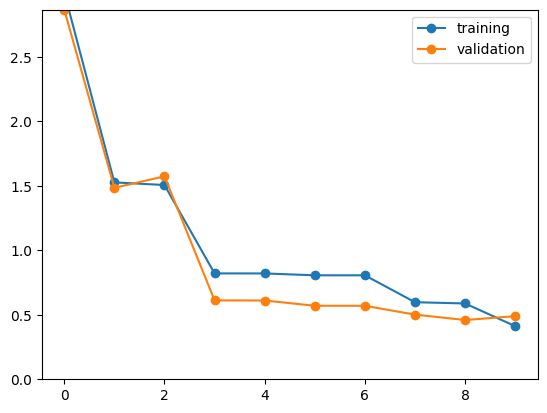

In [6]:
#5) Create a model complexity graph:
#· Show the training and validation RMSE for each degree of polynomial.
#· Use lines and markers for each.
#· Add a legend.

plt.plot(degrees, rmse_train, marker = 'o')
plt.plot(degrees, rmse_val, marker = 'o')
plt.ylim([0, min(max(rmse_train)*2,max(rmse_val))])
plt.legend(['training', 'validation'])
plt.show()

In [7]:
#6) In a markdown cell, choose which polynomial fits best. Write some words to explain and justify your choice.

**Explanation**

The ninth polynomial fits best because of these two qualities
1) The points on the orange and blue lines at number 9 are the closest compared to the other polynomials, and
2) The points at number 9 are the lowest down compared to other points.

These are important factors to consider because it indicates that the model is neither overfitting nor underfitting the data, striking a balance between complexity and performance.

training rmse = 0.41206809604754446
validation rmse = 0.48958174991020637
testing rmse = 0.6261978163032378


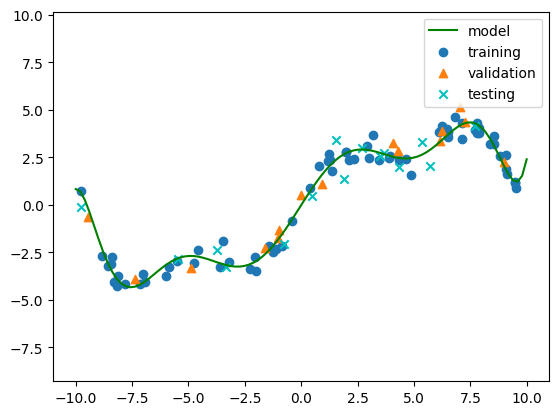

In [11]:
#7) Use your selected model to calculate and display the RMSE of predictions on the test data.
degree = 9

print('training rmse =', rmse(y_train, p[degree](x_train)))
print('validation rmse =', rmse(y_val, p[degree](x_val)))
print('testing rmse =', rmse(y_test, p[degree](x_test)))

x_lat = np.linspace(-10, 10, 100)

plt.plot(x_lat, p[degree](x_lat), color='g')
plt.scatter(x_train,y_train)
plt.scatter(x_val,y_val, marker='^')
plt.scatter(x_test,y_test, marker='x', color='c')
plt.ylim([min(y)-5, max(y)+5])
plt.legend(['model', 'training', 'validation', 'testing'])
plt.show()